# Real Estate Clean up

This is a real dataset, and it was downloaded using web scraping techniques. The data contains registers from **Fotocasa** which is one of the most popular real estate websites in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro, and in no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### Exercise 00. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [ ]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# This CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Exercise 01. Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15335 non-null  int64  
 1   id_realEstates    15335 non-null  int64  
 2   isNew             15335 non-null  bool   
 3   realEstate_name   15325 non-null  object 
 4   phone_realEstate  14541 non-null  float64
 5   url_inmueble      15335 non-null  object 
 6   rooms             14982 non-null  float64
 7   bathrooms         14990 non-null  float64
 8   surface           14085 non-null  float64
 9   price             15335 non-null  int64  
 10  date              15335 non-null  object 
 11  description       15193 non-null  object 
 12  address           15335 non-null  object 
 13  country           15335 non-null  object 
 14  level1            15335 non-null  object 
 15  level2            15335 non-null  object 
 16  level3            15335 non-null  object

In [4]:
sorted_ds = ds[["price","address"]].sort_values(by = "price",ascending = False)
max_price = sorted_ds.iloc[0,0]
#print(max_price)
max_address = sorted_ds.iloc[0,1]
print(f"The house with address {max_address} is the most expensive and its price is {max_price} usd")


The house with address El Escorial is the most expensive and its price is 8500000 usd


#### Exercise 02. Which is the cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [5]:
sorted_ds = ds[ds.price >  0][["price","address"]].sort_values(by = "price",ascending = True)
min_price = sorted_ds.iloc[0,0]
#print(min_price)
min_address = sorted_ds.iloc[0,1]
print(f"The house with address {min_address} is the cheapest and its price is {min_price} usd")

The house with address Berlin, Coslada is the cheapest and its price is 600 usd


#### Exercise 03. Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

`The biggest house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smallest house is located on County Road 1 N and its surface is 200 meters`

In [6]:
sorted_ds = ds[ds.surface >  0][["surface","address"]].sort_values(by = "surface",ascending = True)
min_surface = round(sorted_ds.iloc[0,0])
min_address = sorted_ds.iloc[0,1]
print(f"The smallest house is located on {min_address} and its surface is {min_surface} meters")
sorted_ds = ds[ds.surface >  0][["surface","address"]].sort_values(by = "surface",ascending = False)
max_surface = round(sorted_ds.iloc[0,0])
max_address = sorted_ds.iloc[0,1]
print(f"The biggest house is located on {max_address} and its surface is {max_surface} meters")

The smallest house is located on Calle Amparo,  Madrid Capital and its surface is 15 meters
The biggest house is located on Sevilla la Nueva and its surface is 249000 meters


#### Exercise 04. How many populations (level5 column) the dataset contains? (★☆☆)

Print the names of the populations with a comma as a separator. For example:

`> print(populations)`

`population1, population2, population3, ...`

In [7]:
ds["level5"].unique()

array(['Arganda del Rey', 'Fuenlabrada', 'Boadilla del Monte',
       'Las Rozas de Madrid', ' Madrid Capital', 'Villaviciosa de Odón',
       'Pinto', 'Valdemoro', 'Navalcarnero', 'Pozuelo de Alarcón',
       'Torrejón de Ardoz', 'Navalagamella', 'San Sebastián de los Reyes',
       'Rivas-vaciamadrid', 'Alpedrete', 'Móstoles',
       'San Fernando de Henares', 'Coslada', 'Becerril de la Sierra',
       'Alcalá de Henares', 'Chinchón', 'Parla', 'Alcorcón',
       'El Escorial', 'Leganés', 'Pedrezuela', 'Majadahonda',
       'Villanueva de la Cañada', 'Villanueva del Pardillo',
       'Torrelodones', 'Moralzarzal', 'Mejorada del Campo', 'Aranjuez',
       'Corpa', 'Getafe', 'Velilla de San Antonio', 'Sevilla la Nueva',
       'San Martín de la Vega', 'Villalbilla', 'Collado Villalba',
       'Alcobendas', 'El Molar (Madrid)', 'Moraleja de Enmedio', 'Algete',
       'Campo Real', 'Torrejón de la Calzada', 'Colmenar Viejo',
       'Valdemorillo', 'Fuente El Saz de Jarama', 'Tres Cantos',

In [8]:
ds["level5"].nunique()

168

#### Exercise 05. Does the dataset contain NAs? (★☆☆)

Print a boolean value (`True` or `False`) followed by the rows/cols that contains NAs.

In [9]:
ds.isnull().sum()

Unnamed: 0              0
id_realEstates          0
isNew                   0
realEstate_name        10
phone_realEstate      794
url_inmueble            0
rooms                 353
bathrooms             345
surface              1250
price                   0
date                    0
description           142
address                 0
country                 0
level1                  0
level2                  0
level3                  0
level4               6643
level5                  0
level6              14627
level7               2277
level8               8579
upperLevel              0
countryId               0
level1Id                0
level2Id                0
level3Id                0
level4Id                0
level5Id                0
level6Id                0
level7Id                0
level8Id                0
accuracy                0
latitude                0
longitude               0
zipCode             15335
customZone          15335
dtype: int64

<Axes: >

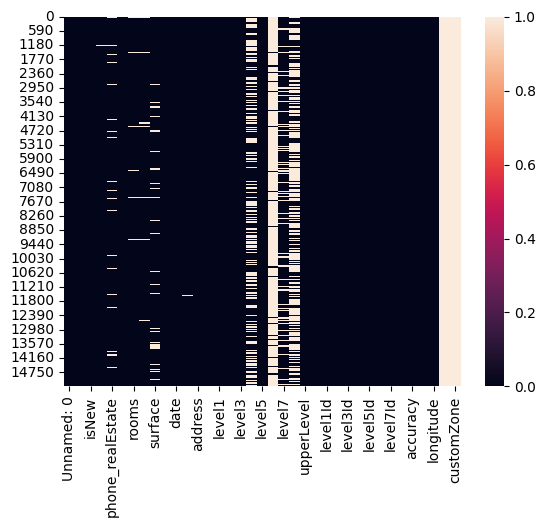

In [10]:
sns.heatmap(ds.isnull())

#### Exercise 06. Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions.

In [11]:
ds.isnull().sum().sum()

np.int64(65690)

In [41]:
ds.dropna()

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone


#### Exercise 07. Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value.

In [50]:
round(ds[ds["level5"] == "Arroyomolinos (Madrid)"]["price"].mean())

294542

#### Exercise 08. Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

<Axes: ylabel='Frequency'>

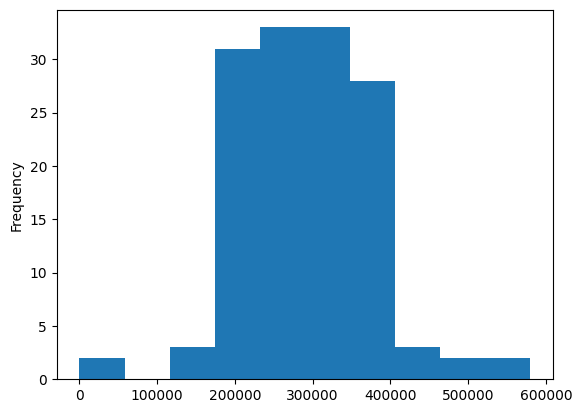

In [51]:
ds[ds["level5"] == "Arroyomolinos (Madrid)"]["price"].plot.hist()

**TODO: Markdown**. To write here, double-click on this cell, remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 09. Are the average prices of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about them.

In [55]:
mean_valdemorillo = round(ds[ds["level5"] == "Valdemorillo"]["price"].mean())
mean_galapagar = round(ds[ds["level5"] == "Galapagar"]["price"].mean())
if mean_galapagar == mean_valdemorillo:
    print("they are equal") 
else:
    print("they are not equal")
print (mean_valdemorillo,mean_galapagar)

they are not equal
363860 360063


#### Exercise 10. Are the average prices per square meter (price/m2) of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about it.

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In [57]:
ds["ppm"] = ds["price"] / ds["surface"]
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone,ppm
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN,1893.203883
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN,3939.393939
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN,1034.883721
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN,1622.641509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN,2702.812500
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN,1100.000000
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN,2828.571429
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN,1930.693069


In [58]:
ppm_valdemorillo = round(ds[ds["level5"] == "Valdemorillo"]["ppm"].mean())
ppm_galapagar = round(ds[ds["level5"] == "Galapagar"]["ppm"].mean())
if ppm_galapagar == ppm_valdemorillo:
    print("they are equal") 
else:
    print("they are not equal")
print (ppm_valdemorillo,ppm_galapagar)

they are not equal
1318 1606


#### Exercise 11. Analyze the relation between the surface and the price of the houses (★★☆)

Hint: You can make a `scatter plot`, then write a conclusion about it.

<Axes: xlabel='surface', ylabel='price'>

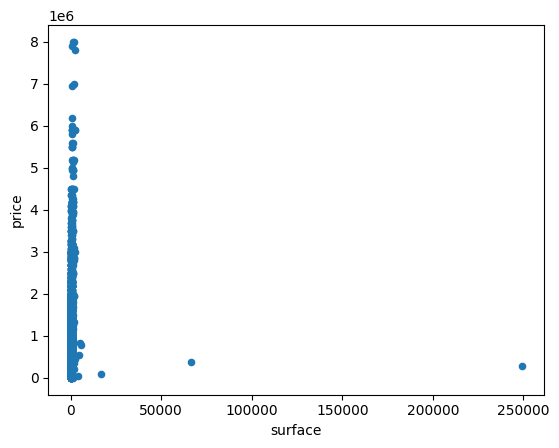

In [11]:
ds.plot.scatter(x="surface", y="price")

#ds[["surface","price"]].corr()

**TODO: Markdown**. To write here, double-click on this cell, remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 12. How many real estate agencies does the dataset contain? (★★☆)

Print the obtained value.

In [11]:
real_estate_agencies = ds["id_realEstates"].count()
print(real_estate_agencies)

15335


#### Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses.

#### Exercise 14. Now let's work with the "south belt" of Madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column `level5` and the function `isin`.

In [17]:
# Group by the 'level5' column to count the number of houses in each population
population = ds.groupby("level5")["level5"].count()

# Find the maximum number of houses and the population that has this maximum
max_houses = population.max()
#print(max_houses)
max_population = population.idxmax()

# Print out the population with the most houses and the count
print(f"The population '{max_population}' contains the most houses and the number of houses is {max_houses} ")


The population ' Madrid Capital' contains the most houses and the number of houses is 6643 


In [16]:
# Create a subset of the DataFrame for specific populations
subset = ds[ds["level5"].isin(["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"])]
subset

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
85,86,153152077,False,sinergical inmobiliaria,NaN,https://www.fotocasa.es/es/comprar/vivienda/le...,1.0,1.0,50.0,107000,...,0,0,0,0,0,1,"40,35059","-3,82693",NaN,NaN
94,95,153995577,False,viviendas365com,911226014.0,https://www.fotocasa.es/es/comprar/vivienda/le...,3.0,2.0,120.0,320000,...,0,0,0,0,0,0,"40,31933","-3,77574",NaN,NaN
109,110,153586414,False,area uno asesores inmobiliarios,912664081.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,3.0,142.0,425000,...,0,0,0,0,0,0,"40,3313411","-3,8313868",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15275,15276,153903887,False,aliseda servicios de gestion inmobiliaria,911368198.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,1.0,78.0,138000,...,0,0,0,0,0,1,"40,31381","-3,83733",NaN,NaN
15291,15292,151697757,False,unipiso,912788631.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,2.0,110.0,279000,...,0,0,0,0,0,0,"40,3259051","-3,76318",NaN,NaN
15305,15306,153902389,False,jadein ferrero,914871639.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,85.0,170000,...,0,0,0,0,0,0,"40,2882193","-3,8098617",NaN,NaN
15322,15323,153871864,False,gestion comercial,911220662.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,91.0,112000,...,0,0,0,0,0,0,"40,28282","-3,78892",NaN,NaN


#### Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in Exercise 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot.

In [31]:
median_price = round(ds["price"].median())
median_price

280000

In [29]:
population = round(subset.groupby("level5")["price"].median()).index
population

Index(['Alcorcón', 'Fuenlabrada', 'Getafe', 'Leganés'], dtype='object', name='level5')

<BarContainer object of 4 artists>

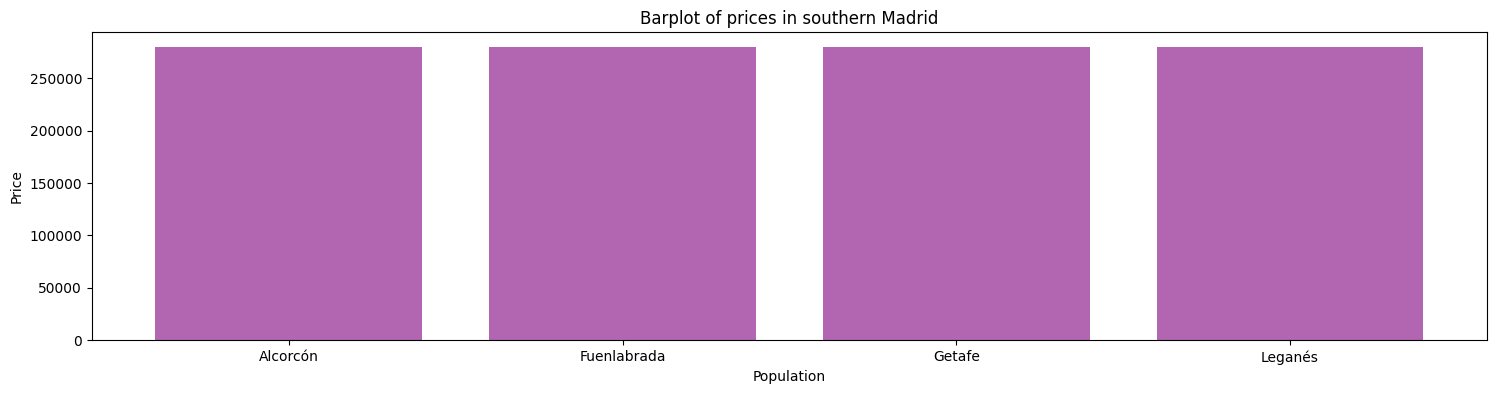

In [34]:
plt.figure(figsize=(18,4))
plt.title("Barplot of prices in southern Madrid")
plt.xlabel("Population")
plt.ylabel("Price")
plt.ticklabel_format(style='plain')
plt.bar(population, prices, color='purple', alpha=0.6)

**TODO: Markdown**. To write here, double-click on this cell, remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in Exercise 14) (★★★)

Print both values for each variable.

In [35]:
print("The sample's mean and variance scores for price was " + str(round(subset["price"].mean(),2)) + " and " + str(round(subset["price"].var(),2)) + " respectively.")
print("The sample's mean and variance scores for rooms was " + str(round(subset["rooms"].mean(),2)) + " and " + str(round(subset["rooms"].var(),2)) + " respectively.")
print("The sample's mean and variance scores for surface area was " + str(round(subset["surface"].mean(),2)) + " and " + str(round(subset["surface"].var(),2)) + " respectively.")
print("The sample's mean and variance scores for bathrooms was " + str(round(subset["bathrooms"].mean(),2)) + " and " + str(round(subset["bathrooms"].var(),2)) + " respectively.")

The sample's mean and variance scores for price was 223094.48 and 14921367508.05 respectively.
The sample's mean and variance scores for rooms was 3.02 and 0.72 respectively.
The sample's mean and variance scores for surface area was 111.75 and 4263.05 respectively.
The sample's mean and variance scores for bathrooms was 1.63 and 0.57 respectively.


#### Exercise 17. What is the most expensive house in each population? You must use the subset obtained in Exercise 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population.

In [36]:
for i in subset["level5"].unique():
    subset17 = subset[subset["level5"] == i]
    max_price_idx = subset17["price"].idxmax()
    
    max_address = subset.loc[max_price_idx]["address"]
    max_price = subset17["price"].max()
    print(f"The address for the highest priced property in {i} is {max_address} and its price is {max_price} USD.")

The address for the highest priced property in Fuenlabrada is Calle de Paulo Freire, 5, Fuenlabrada and its price is 490000 USD.
The address for the highest priced property in Alcorcón is Alcorcón and its price is 950000 USD.
The address for the highest priced property in Leganés is Avenida Reina Sofía, Leganés and its price is 650000 USD.
The address for the highest priced property in Getafe is Getafe and its price is 1050000 USD.


#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in Exercise 14) (★★★)

For the normalization method, you can use the one you consider; there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot.

Hint: You can help yourself by reviewing the *multihist* demo of Matplotlib.

In [23]:
def min_max_normalize(series):
    return(series - series.min()) / (series.max() - series.min())

In [25]:
subset.loc[:, 'Normalized_Price'] = subset.groupby('level5')['price'].transform(min_max_normalize)

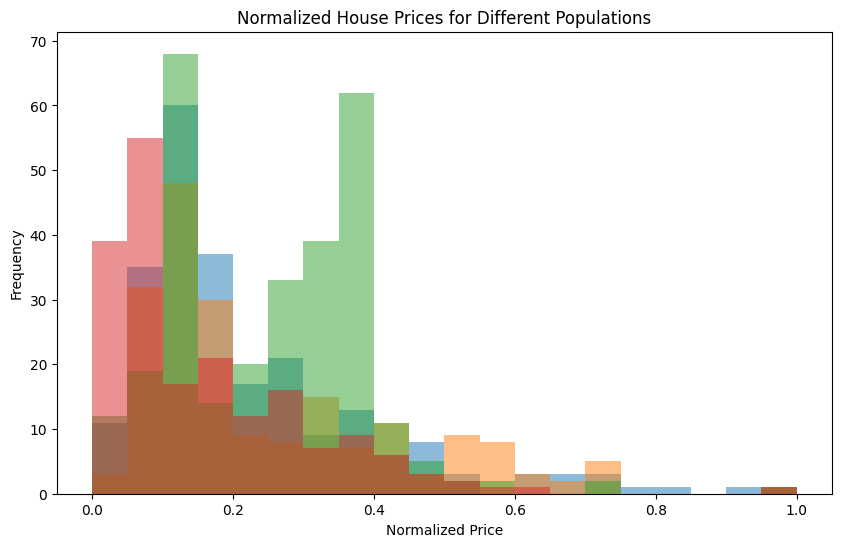

In [27]:
plt.figure(figsize=(10, 6))
populations = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

for population in populations:
    # Extract normalized prices for the current population
    data = subset[subset['level5'] == population]['Normalized_Price']
    
    plt.hist(data, bins=20, alpha=0.5, label=population)

plt.title('Normalized House Prices for Different Populations')
plt.xlabel('Normalized Price')
plt.ylabel('Frequency')
plt.show()

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in Exercise 14 (★★☆)

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In [29]:
subset = subset.copy()
subset.loc[:, 'pps'] = subset['price'] / subset['surface']

In [31]:
getafe_data = subset[subset['level5'] == 'Getafe']
alcorcon_data = subset[subset['level5'] == 'Alcorcón']

In [32]:
getafe_mean_pps = getafe_data['pps'].mean()
getafe_median_pps = getafe_data['pps'].median()

alcorcon_mean_pps = alcorcon_data['pps'].mean()
alcorcon_median_pps = alcorcon_data['pps'].median()

print(f"Getafe - Mean Price per Square Meter: {getafe_mean_pps:.2f} USD/m2")
print(f"Getafe - Median Price per Square Meter: {getafe_median_pps:.2f} USD/m2")
print(f"Alcorcón - Mean Price per Square Meter: {alcorcon_mean_pps:.2f} USD/m2")
print(f"Alcorcón - Median Price per Square Meter: {alcorcon_median_pps:.2f} USD/m2")

Getafe - Mean Price per Square Meter: 2066.31 USD/m2
Getafe - Median Price per Square Meter: 1973.33 USD/m2
Alcorcón - Mean Price per Square Meter: 2239.30 USD/m2
Alcorcón - Median Price per Square Meter: 2207.79 USD/m2


#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph. You must use the subset obtained in Exercise 14 (★★☆)
 
Hint: Make a scatter plot of each population using subplots.

In [33]:
subset = subset.copy()
subset.loc[:, 'pps'] = subset['price'] / subset['surface']

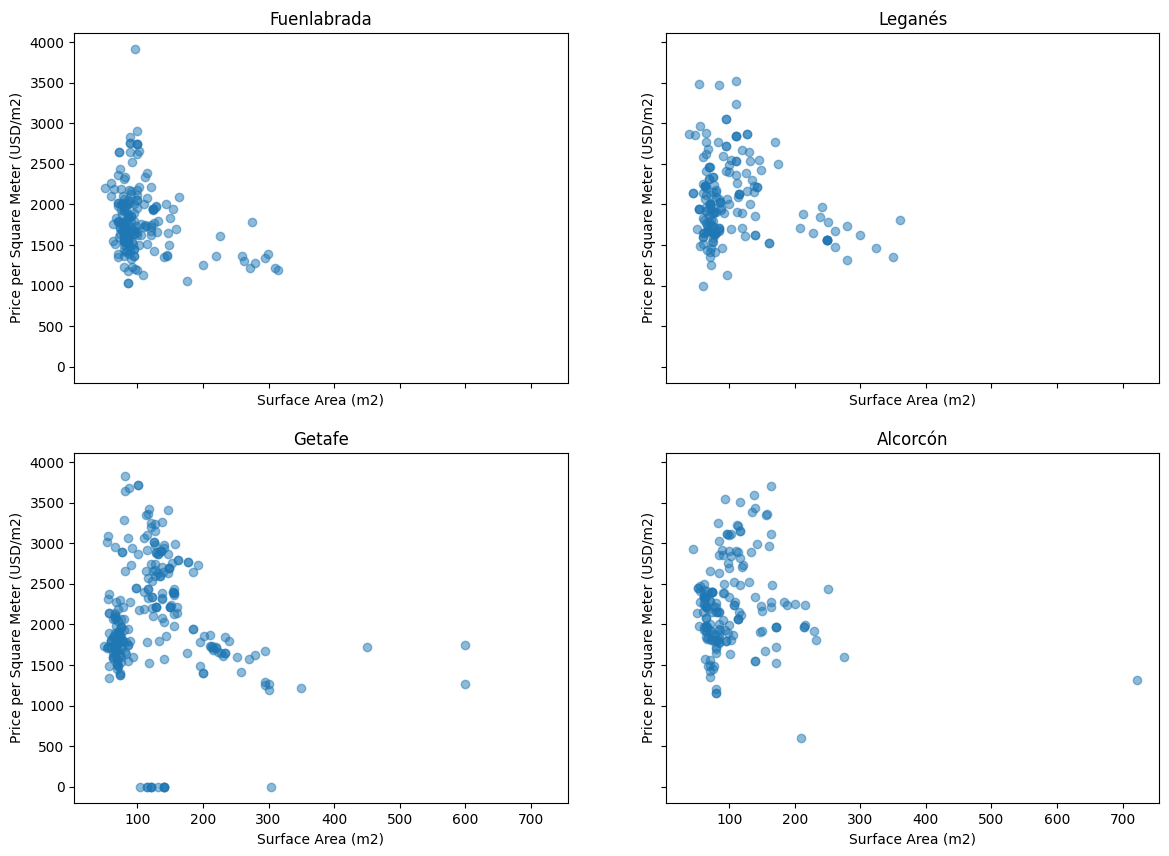

In [34]:
populations = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, population in enumerate(populations):
    data = subset[subset['level5'] == population]
    axes[i].scatter(data['surface'], data['pps'], alpha=0.5)
    axes[i].set_title(f'{population}')
    axes[i].set_xlabel('Surface Area (m2)')
    axes[i].set_ylabel('Price per Square Meter (USD/m2)')

plt.show()

#### Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in Exercise 14) (★★★★)

Execute the following cell, and then start coding in the next one. You must implement a simple code that transforms the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map

In [57]:
from ipyleaflet import Map, CircleMarker, basemaps
from ipywidgets import Layout

madrid_center = (40.3, -3.7)

map = Map(center=madrid_center, zoom=12, min_zoom=10, max_zoom=20, basemap=basemaps.OpenStreetMap.Mapnik, layout=Layout(width='800px', height='600px'))
map

coordinates_dict = {}

for population in subset['level5'].unique():
    # Filter data for the current population
    pop_data = subset[subset['level5'] == population]
    # Create a list of tuples (latitude, longitude) for the population
    coordinates_dict[population] = list(zip(pop_data['latitude'], pop_data['longitude']))

In [58]:
colors = {
    "Fuenlabrada": "blue",
    "Leganés": "green",
    "Getafe": "red",
    "Alcorcón": "purple"
}

for index, row in subset.iterrows():
    population = row['level5']
    color = colors.get(population, "black")  # Default color black if not found
    marker = CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=5,
        color=color,
        fill_color=color,
        fill_opacity=0.6
    )
map.add_layer(marker)
map


Map(center=[40.3, -3.7], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…